# The Box-Muller Method
The Box-Muller Method can generate IID gaussians
Let $U_1$ and $U_2$ be independent uniform random variabels on $[0, 1]$, and
$$Z_1 = \sqrt{-2\log U_1}\cos(2\pi U_2)  $$
$$Z_2 = \sqrt{-2\log U_1}\sin(2\pi U_2) $$
then $Z_1$ and $Z_2$ are IID standard Gaussians

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate samples of z1, z2 by the Box-Muller
u1, u2 = np.random.uniform(size=(2, 10000))
z1 = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
z2 = np.sqrt(-2*np.log(u1)) * np.sin(2*np.pi*u2)

Text(0.5, 1.0, 'Histogram of $Z_1$ and $Z_2$ compared to the standard Gaussian Distribution')

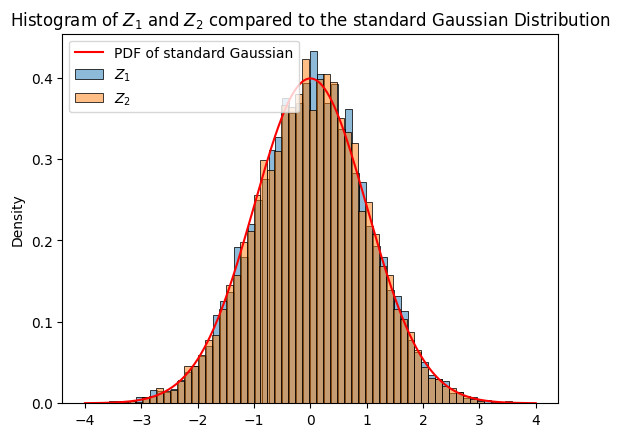

In [25]:
import scipy as sp
x = np.linspace(-4, 4, 1000)
p = sp.stats.norm.pdf(x)
sns.histplot(z1, stat='density', alpha=0.5, label='$Z_1$')
sns.histplot(z2, stat='density', alpha=0.5, label='$Z_2$')
sns.lineplot(x=x, y=p, color='red', label='PDF of standard Gaussian')
plt.title('Histogram of $Z_1$ and $Z_2$ compared to the standard Gaussian Distribution')

In [37]:
print(f'Cov(Z1, Z2) = {np.cov(z1, z2)[0][1]:.2f} ~= 0, hence they are indeed independent')

Cov(Z1, Z2) = -0.02 ~= 0, hence they are indeed independent


# Simulating Brownian Motion
A process $B_t$ has the distribution of a standard Brownian motion if and only if the following hold
1) It is a Gaussian process
2) It has mean 0 and covariance $E[B_t B_s] = min(s, t)$
3) Its path $t \mapsto B_t(\omega)$ are continuous for \omega in a set of probability one

Construct the covariance matrix $C$ of $B_{t/100}, 1 \leq t \leq 100$, where Cov(s, t) = min(s, t)

Note that the joint pdf of multivariate gaussian is
$$f(x_1,...,x_n) = \exp{(\dfrac{-1}{2}(x-m)^TC^{-1}(x-m))}/(2\pi)^{n/2}(\det{C})^{1/2}$$
Then, we can use the Cholesky decomposition which works on positive definite matrix $C$
$$ C = AA^T$$
the joint pdf then becomes
$$\begin{align}
f(x_1,...,x_n) &= \exp{(\dfrac{-1}{2}(x-m)^TA^TA(x-m))}/(2\pi)^{n/2}(\det{AA^T})^{1/2} \\
&\propto \exp{(\dfrac{-1}{2}(A(x-m))^TA(x-m))}
\end{align}$$

Let
$$ A(x-m) = Z $$
then the expression
$$ \exp{(\dfrac{-1}{2}Z^TZ)} $$
is propotional to multivariate IID standard gaussian distribution where Z is the random vector.

Hence, by sampling from IID standard gaussian Z, we can obtain the brownian process by applying the transformation $X = A^{-1} Z$

In [41]:
import numpy as np


# Construct the covariance matrix of B_t
T = 100
step_size = 0.01
C = np.zeros((T,T))
for i in range(T):
    for j in range(T):
        s = i + 1
        t = j + 1
        C[i][j] = min(s, t)
C


array([[  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  1.,   2.,   2., ...,   2.,   2.,   2.],
       [  1.,   2.,   3., ...,   3.,   3.,   3.],
       ...,
       [  1.,   2.,   3., ...,  98.,  98.,  98.],
       [  1.,   2.,   3., ...,  98.,  99.,  99.],
       [  1.,   2.,   3., ...,  98.,  99., 100.]])

In [42]:
A = np.linalg.cholesky(C)
Z = 

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])